In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as pdr

from statsmodels.tsa.ar_model import AutoReg, ar_select_order

# Data

In [5]:
data = pdr.get_data_fred("HOUSTNSA", "1959-01-01", "2019-06-01")
housing = data.HOUSTNSA.pct_change().dropna()

In [6]:
type(housing)

pandas.core.series.Series

In [7]:
housing

DATE
1959-02-01    0.029106
1959-03-01    0.289899
1959-04-01    0.180893
1959-05-01    0.011273
1959-06-01   -0.030820
                ...   
2019-02-01   -0.080460
2019-03-01    0.227500
2019-04-01    0.187373
2019-05-01    0.012864
2019-06-01   -0.025402
Name: HOUSTNSA, Length: 725, dtype: float64

In [8]:
# format plot
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

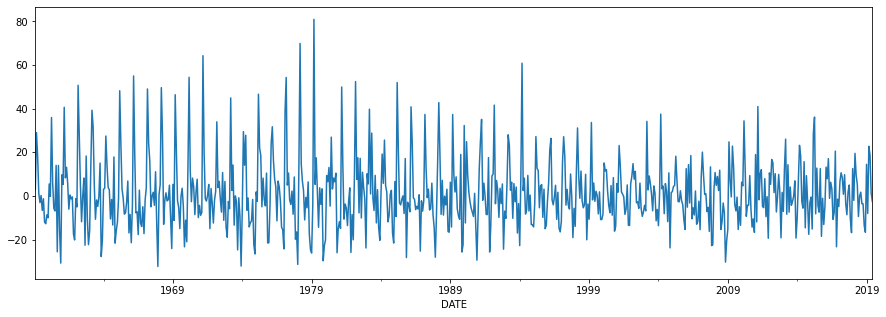

In [9]:
# Scale by 100 to get percentages
housing = 100 * housing.asfreq("MS")
fig, ax = plt.subplots(figsize=(15, 5))
ax = housing.plot(ax=ax)

# Turn Data into Chunks

In [10]:
def rolling_window(ts, window):
    """ Extract all consequtive subsequences of the time series ts of length window.
    
    Notes
    --------
    1.  If you update any values in the returned array is changes the values in the 
    original array, and vice-versa.
    
    References
    ----------
    https://stackoverflow.com/questions/27852343/split-python-sequence-time-series-array-into-subsequences-with-overlap

    Parameters
    ----------
    ts : array-like of shape (n, )
        Time series data. This won't work for an array of shape (n, 1).
    window : int
        The window size. The time series data is split into subarrays each of length window. 

    Returns
    -------
    array-like of shape (n - window + 1, window)
        _description_
    """
    shape = (ts.size - window + 1, window)
    strides = ts.strides * 2
    return np.lib.stride_tricks.as_strided(ts, shape=shape, strides=strides)
    

# Autoregressive Model (AR)

$AR(p) := x_t = c + \sum_{i=1}^p \phi_i x_{t - i} + \epsilon_t$

AR models forecasts the $t$th datapoint by looking at the $p$ previous datapoints, weighting them by some factor, adding a constant $c$, and adding unpredictable noise $\epsilon_t$.

In [12]:
mod = AutoReg(housing, 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Fri, 10 Jun 2022   AIC                           5996.884
Time:                        07:56:46   BIC                           6019.794
Sample:                    05-01-1959   HQIC                          6005.727
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1228      0.573      1.961      0.050       0.000       2.245
HOUSTNSA.L1     0.1910      0.036      5.235      0.000       0.120       0.263
HOUSTNSA.L2     0.0058      0.037      0.155    

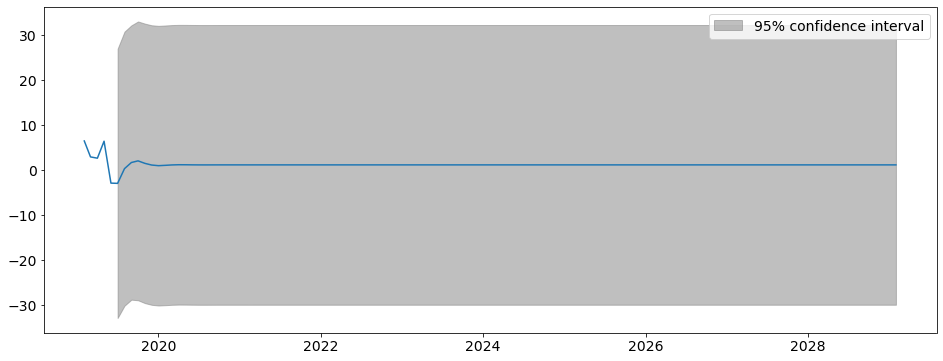

In [20]:
fig = res.plot_predict(720, 840)

In [22]:
res = ar_select_order(housing, 13, seasonal=True, old_names=False).model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:               Seas. AutoReg(2)   Log Likelihood               -5982.094
Method:               Conditional MLE   S.D. of innovations            948.660
Date:                Fri, 10 Jun 2022   AIC                          11994.188
Time:                        08:17:47   BIC                          12062.939
Sample:                    04-01-1959   HQIC                         12020.724
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         127.2584    137.291      0.927      0.354    -141.827     396.344
s(2,12)      3264.7709    182.376     17.901      0.000    2907.321    3622.221
s(3,12)      2306.8518    243.536      9.472    

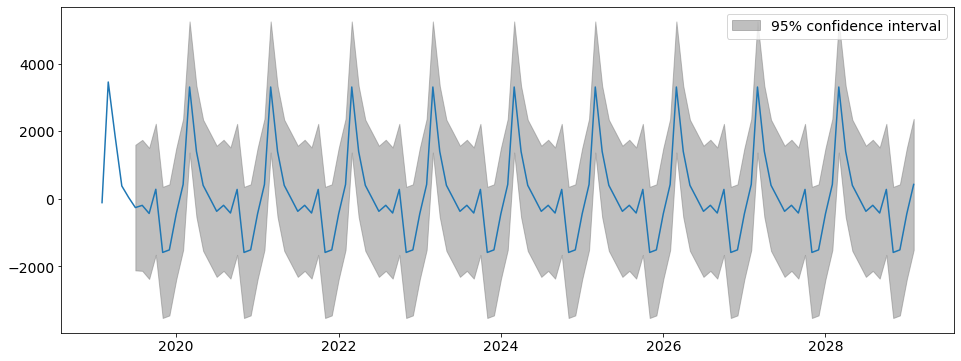

In [23]:
fig = res.plot_predict(720, 840)

# Sources

1. https://www.statsmodels.org/dev/examples/notebooks/generated/autoregressions.html
2. https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/